In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

from scipy import stats
import seaborn as sns

from sklearn.cluster import KMeans

In [397]:
shark_attacks = pd.read_csv("clean_GSAF5.xls.csv")
print(len(shark_attacks))

2131


In [398]:
def convert_type_to_int(input):

    if input == "Unprovoked":
        return 0
    if input == "Provoked" or input == "Watercraft" or input == "Boating" or input == "Boat" or input == "Sea Disaster":
        return 1
    if input == "Questionable":
        return 2
    if input == "Under investigation":
        return 3
    
    return 4

def convert_sov_to_int(input):

    if input == "M":
        return 0
    if input == "F":
        return 1
    return 2

def convert_time_to_int(input):

    buffer = input.split('h')
    result = int(buffer[0] + buffer[1])

    if result > 2400:
        result = int(str(result)[0:len(str(result))-1])

    return result

def convert_age_to_int(input):

    if input > 100:
        return int(str(input)[0:2]) + 5
    
    return input

def convert_fatal_to_int(input):

    if input == "Y":
        return 1
    
    return 0

def convert_year_to_int(input):
    return int(input)

def convert_year_to_str(input):

    if input < 1900:
        return ""
    
    if input > 2024:
        return str(input - 100)
    
    return str(input)

shark_attacks["Type"] = shark_attacks["Type"].apply(convert_type_to_int)
shark_attacks["Sex of Victim"] = shark_attacks["Sex of Victim"].apply(convert_sov_to_int)
shark_attacks["Time"] = shark_attacks["Time"].apply(convert_time_to_int)
shark_attacks["Age"] = shark_attacks["Age"].apply(convert_age_to_int)
shark_attacks["Fatal (Y/N)"] = shark_attacks["Fatal (Y/N)"].apply(convert_fatal_to_int)
shark_attacks["Year"] = shark_attacks["Year"].apply(convert_year_to_str)
shark_attacks = shark_attacks[~shark_attacks["Year"].str.match("^$")]
shark_attacks["Year"] = shark_attacks["Year"].apply(convert_year_to_int)
shark_attacks

,Unnamed: 0,index,Year,Type,Country,Area,Location,Activity,Sex of Victim,Age,Injury,Fatal (Y/N),Time,Species,Month,Day
0,2,2,2020,0,AUSTRALIA,New South Wales,Windang Beach,Surfing,0,59,Laceration ot left ankle and foot,0,800,"""A small shark""",1,17
1,3,3,2020,0,NEW ZEALAND,Southland,Oreti Beach,Surfing,1,13,Minor injury to lower leg,0,2030,Broadnose seven gill shark?,1,16
2,4,4,2020,0,USA,North Carolina,"Rodanthe, Dare County",Surfing,0,26,Lacerations to foot,0,1433,Unknown,1,13
3,5,5,2020,0,THAILAND,Phang Nga Province,Nang Thong Beach,Swimming,0,75,Calf bitten,0,715,Unknown,1,12
4,6,6,2020,0,AUSTRALIA,Queensland,North West Island,Swimming,1,7,Lacerations to leg,0,1730,Lemon shark,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5656,5656,2005,0,AUSTRALIA,New South Wales,Lismore,Bathing,2,40,Righ thigh severely bitten,0,900,5' shark,3,26
2101,5685,5685,1902,0,NICARAGUA,Rio San Juan,Greytown,Swimming,2,30,FATAL,1,1800,Unknown,12,22
2102,5686,5686,2002,0,AUSTRALIA,New South Wales,"Middle Harbour, Sydney",Swimming,2,17,FATAL,1,1330,Unknown,11,10
2103,5699,5699,2002,0,AUSTRALIA,Queensland,Brisbane,Swimming,2,16,Legs bitten,0,1200,Unknown,1,19


c:\Users\skyli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


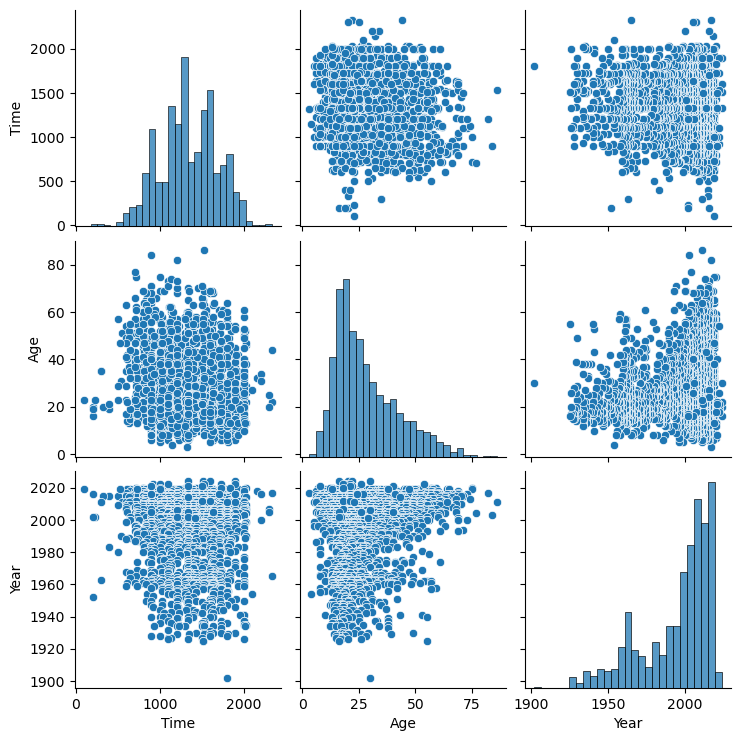

In [399]:
columns_of_interest = shark_attacks[["Time", "Age", "Year"]]
sns.pairplot(columns_of_interest)

In [400]:
# Determine the cluster centers using 5 clusters.

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(columns_of_interest[["Year", "Age"]])
kmeans.cluster_centers_

array([[2007.95643939,   47.47159091],
       [1960.26741996,   23.6440678 ],
       [2005.08325359,   20.26028708]])

In [401]:
shark_attacks["Clusters"] = kmeans.labels_  # Add the cluster ID to each row that it belongs to. 5 clusters = 0, 1, 2, 3, 4 for the IDs.
shark_attacks

,Unnamed: 0,index,Year,Type,Country,Area,Location,Activity,Sex of Victim,Age,Injury,Fatal (Y/N),Time,Species,Month,Day,Clusters
0,2,2,2020,0,AUSTRALIA,New South Wales,Windang Beach,Surfing,0,59,Laceration ot left ankle and foot,0,800,"""A small shark""",1,17,0
1,3,3,2020,0,NEW ZEALAND,Southland,Oreti Beach,Surfing,1,13,Minor injury to lower leg,0,2030,Broadnose seven gill shark?,1,16,2
2,4,4,2020,0,USA,North Carolina,"Rodanthe, Dare County",Surfing,0,26,Lacerations to foot,0,1433,Unknown,1,13,2
3,5,5,2020,0,THAILAND,Phang Nga Province,Nang Thong Beach,Swimming,0,75,Calf bitten,0,715,Unknown,1,12,0
4,6,6,2020,0,AUSTRALIA,Queensland,North West Island,Swimming,1,7,Lacerations to leg,0,1730,Lemon shark,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5656,5656,2005,0,AUSTRALIA,New South Wales,Lismore,Bathing,2,40,Righ thigh severely bitten,0,900,5' shark,3,26,0
2101,5685,5685,1902,0,NICARAGUA,Rio San Juan,Greytown,Swimming,2,30,FATAL,1,1800,Unknown,12,22,1
2102,5686,5686,2002,0,AUSTRALIA,New South Wales,"Middle Harbour, Sydney",Swimming,2,17,FATAL,1,1330,Unknown,11,10,2
2103,5699,5699,2002,0,AUSTRALIA,Queensland,Brisbane,Swimming,2,16,Legs bitten,0,1200,Unknown,1,19,2


In [402]:
# See how many rows belong to each cluster.

shark_attacks["Clusters"].value_counts()

Clusters
2    1045
1     531
0     528
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Age'>

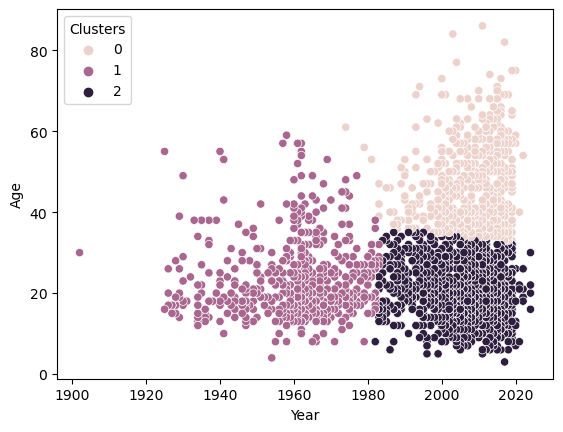

In [403]:
#kmeans.predict([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2], [3, 0], [3, 1], [3, 2], [4, 0], [4, 1], [4, 2]])
# Display scatter plot of the chart broken up into those clusters.

sns.scatterplot(shark_attacks, x="Year", y="Age", hue="Clusters")